# nidaqmx-python 기초 사용법

- write by thomas in 230406
- python 3.8.10 기준
- ref: https://github.com/lv-yj/nidaqmx-python 

In [ ]:
# NI-DAQmx 드라이버가 사전에 설치되어 있어야 한다.
# nidaqmx 파이썬 드라이버를 설치한다.
! python -m pip install nidaqmx

### 사용법
다음은 nidaqmx.task.Task 객체를 사용하는 기본 예제입니다. 

In [20]:
import nidaqmx
with nidaqmx.Task() as task:
    task.ai_channels.add_ai_voltage_chan("6220/ai0")
    rVal = task.read()
print( rVal )

-0.07477034821619312


In [21]:
with nidaqmx.Task() as task:
    task.ai_channels.add_ai_voltage_chan("6220/ai0")
    rVal = task.read(number_of_samples_per_channel=2)
print( rVal )

[-0.07477034821619312, 0.039979247413556324]


In [22]:
with nidaqmx.Task() as task:
    task.ai_channels.add_ai_voltage_chan("6220/ai0")
    rVal = task.read(number_of_samples_per_channel=100)
print( rVal )

[-0.07477034821619312, 0.039979247413556324, 0.014801477095858637, 0.13763847773674734, 0.13458662678914762, 0.14923551133762628, 0.16022217474898526, 0.27253028962065495, 0.29206213568529316, 0.3109836115604114, 0.2555925168614765, 0.38865321817682424, 0.3968932157353435, 0.39765617847224344, 0.3965880306405835, 0.3836176641132847, 0.42542802209540087, 0.4966887417218543, 0.4943998535111545, 0.5273598437452315, 0.6810205389568773, 0.629902035584582, 0.6111331522568437, 0.6241035187841426, 0.6549272133548998, 0.7403790398876919, 0.793481246375927, 0.8294930875576036, 0.8639790032654805, 0.8948026978362377, 0.858638264107181, 0.9631641590624714, 0.9611804559465316, 0.9761345255897702, 0.9616382335886715, 1.074098941007721, 1.130100405896176, 1.162755211035493, 1.1499374370555742, 1.1468855861079745, 1.262398144474624, 1.269569994201483, 1.3333536790063174, 1.358226264229255, 1.3296914578691976, 1.2993255409405804, 1.3765373699148533, 1.3718070009460739, 1.4949491866817224, 1.42612994781

In [ ]:
! python -m pip install matplotlib

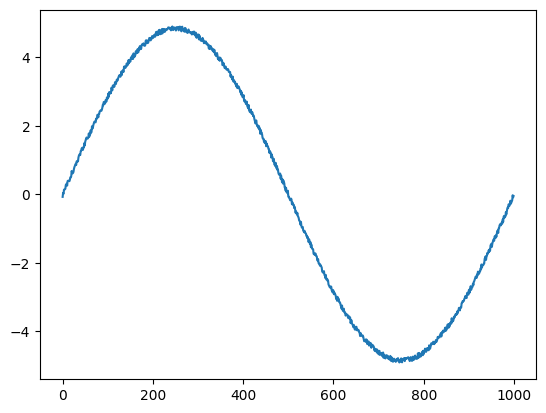

In [27]:
import matplotlib.pyplot as plt

def read_ai(samples):
    with nidaqmx.Task() as task:
        task.ai_channels.add_ai_voltage_chan("6220/ai0")
        return task.read(number_of_samples_per_channel=samples)

plt.plot(read_ai(1000))
plt.show()

### Digital

In [31]:
from nidaqmx.constants import LineGrouping
with nidaqmx.Task() as task:
    task.di_channels.add_di_chan(
        "6220/port0/line0:7", 
        line_grouping=LineGrouping.CHAN_PER_LINE,
    )
    rVal = task.read(number_of_samples_per_channel=1)
print( rVal )

[[False], [False], [False], [False], [False], [False], [False], [False]]


### Counter

In [ ]:
import nidaqmx
from nidaqmx.types import CtrTime
with nidaqmx.Task() as task:
    task.co_channels.add_co_pulse_chan_time("6220/ctr0")
    sample = CtrTime(high_time=0.001, low_time=0.001)
    task.write( sample )

In [ ]:
import nidaqmx
with nidaqmx.ao_channels.add_ao_voltage_chan("6220/ao0")
task.write( [1.1, 2.2, 3.3, 4.4, 5.5], auto_start=True)
!! 6220 have not ao